# Bryce Harper : An in-depth review of Home Runs

In a recent capstone project that I completed I reviewed home run data from the 2015, 2016, and 2017 MLB seasons in order to analyze what was influencing the launch speeds (exit velocity) of home run hits and ultimately leading to an increase in home runs. I realized that through this project I could get even more granular in the data and review home runs by MLB divisions, leagues, teams and players. So, I decided to create a home run scouting report of the leagues best and most popular players, Bryce Harper. Using the same data from my capstone project I will analyze Harper's home run stats from the 2015, 2016 and 2017 seasons.

#### Capstone Project

To see the entirety of my capstone project copy and paste the below web browser into a web browser:
- https://github.com/datanelson518/MLB_Home_Run_Exit_Velocity

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

plt.style.use('fivethirtyeight')

np.random.seed(42)

### Load in the Data

The below dataset is the data that I used during my capstone project. It has been cleaned to ensure all empty observations have been filled and features that don't influence home run exit velocities have been dropped.

In [3]:
df = pd.read_csv('../data/final_for_preprocessing.csv')

In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)

#### Filtering the data for Bryce Harper

This is a Bryce Harper home run scouting report so I will filter the data down to focus on only home run hits by Harper.

**NOTE:** Some of Harpers home run observations may of been dropped during data cleaning because of lack of data tracked on that specific observation. If you'd like to review further please review the Data Cleaning notebook from my main capstone project repository.
- https://github.com/datanelson518/MLB_Home_Run_Exit_Velocity/blob/master/notebooks/01-Data_Cleaning.ipynb

In [5]:
harper_df = df[df['player_name'] == 'Bryce Harper']

In [6]:
harper_df.head()

,pitch_type,release_speed,release_pos_x,release_pos_z,player_name,zone,p_throws,bb_type,game_year,pfx_x,...,release_extension,release_pos_y,height,weight,age,weight_(oz),circumference_(in),avg_seam_height,avg_ccor,avg_ds
18,FT,92.7,-1.6560,6.0867,Bryce Harper,5.0,R,line_drive,2017,-1.492200,...,6.521,53.9785,75,220,25,5.104863,9.080000,0.038000,0.476463,12926.000
207,SI,92.9,-2.2145,5.5769,Bryce Harper,5.0,R,line_drive,2016,-1.639958,...,6.812,53.6877,75,220,25,5.122500,9.079000,0.038432,0.494100,12926.400
214,FF,95.2,-1.7871,6.0802,Bryce Harper,9.0,R,fly_ball,2016,-1.065200,...,6.269,54.2331,75,220,25,5.122500,9.079000,0.038432,0.494100,12926.400
222,FF,87.2,2.4795,5.7823,Bryce Harper,12.0,L,line_drive,2017,0.692600,...,6.367,54.1346,75,220,25,5.104863,9.080000,0.038000,0.476463,12926.000
265,FF,90.6,-1.4216,6.1155,Bryce Harper,1.0,R,line_drive,2015,-1.016492,...,6.036,54.4654,75,220,25,5.120125,9.107917,0.040502,0.491333,12740.875


### Bryce Harper Home Runs by Season

The below plot will provide an insight into the number of home runs that Bryce Harper has hit in the 2015, 2016, and 2017 seasons.

In [9]:
harper_hr_season = harper_df.groupby(['game_year']).agg({'pitch_type':'count'})
harper_hr_season.columns = ['home_run_total']
harper_hr_season

,home_run_total
game_year,
2015,40
2016,22
2017,29


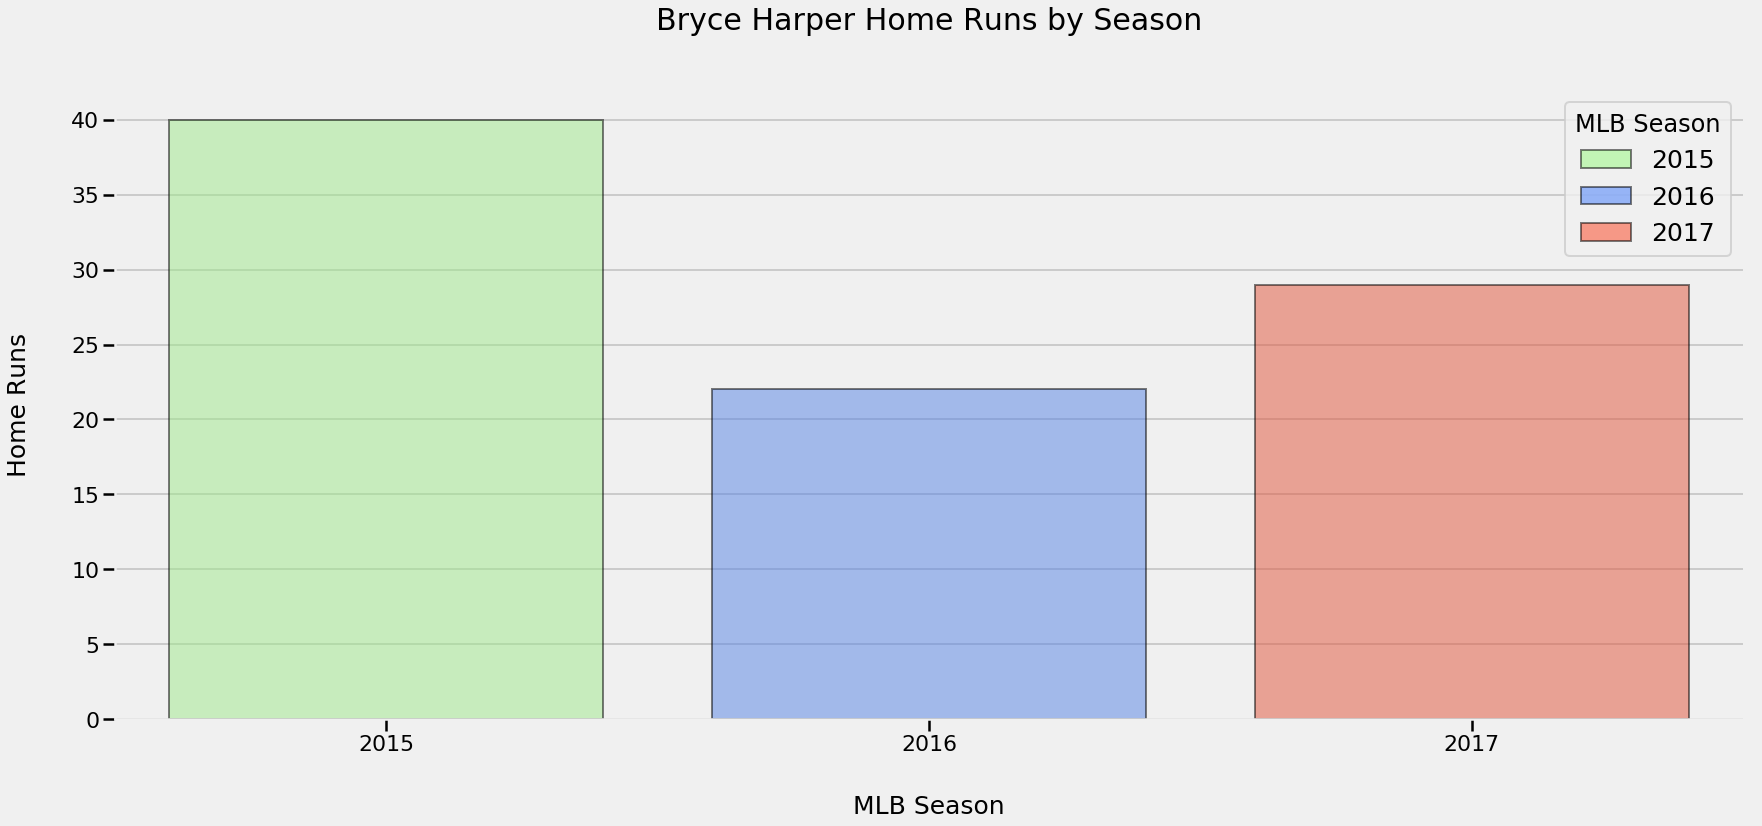

In [30]:
plt.figure(figsize=(25, 12))

colors = ["light green", "lightish blue", "orange red"]
palette=sns.xkcd_palette(colors)
sns.set_context('poster', rc={'patch.linewidth':2})

plt.title('Bryce Harper Home Runs by Season', fontsize=30, pad=60)

a = sns.barplot(harper_hr_season.index,
                harper_hr_season['home_run_total'],
                palette=palette,
                edgecolor='k',
                alpha=.5)

sns.despine()

plt.xlabel('MLB Season', fontsize=25, labelpad=40)
plt.ylabel('Home Runs', fontsize=25, labelpad=40)

greenpatches = mpatches.Patch(edgecolor='k', facecolor='#96f97b', label='2015', alpha=.5)
bluepatches = mpatches.Patch(edgecolor='k', facecolor='#3d7afd', label='2016', alpha=.5)
redpatches = mpatches.Patch(edgecolor='k', facecolor='#fd411e', label='2017', alpha=.5)

plt.legend(title='MLB Season', handles=[greenpatches, bluepatches, redpatches], loc=1, fontsize=25)

plt.tight_layout();
plt.savefig('../plots/harper_hr_seasons.png')

### Bryce Harper Home Run Launch Speeds (Exit Velocity) and Angles

The below plot will provide insight into the velocity on each each of Harper's home run hits and the launch angle of the ball as it left the bat.

In [11]:
harper_df2 = harper_df.sort_values('launch_speed', ascending=False)[['launch_speed', 
                                                                     'launch_angle']].reset_index().drop('index', 
                                                                                                         axis=1)

In [12]:
ps = []
color=[]
for x in harper_df2['launch_speed']:
    if x >= 106:
        ps.append(4000)
        color.append('#96f97b')
    elif 100 <= x < 106:
        ps.append(2000)
        color.append('#3d7afd')
    elif x < 100:
        ps.append(1000)
        color.append('#fd411e')
harper_df2['point_size'] = ps
harper_df2['color'] = color

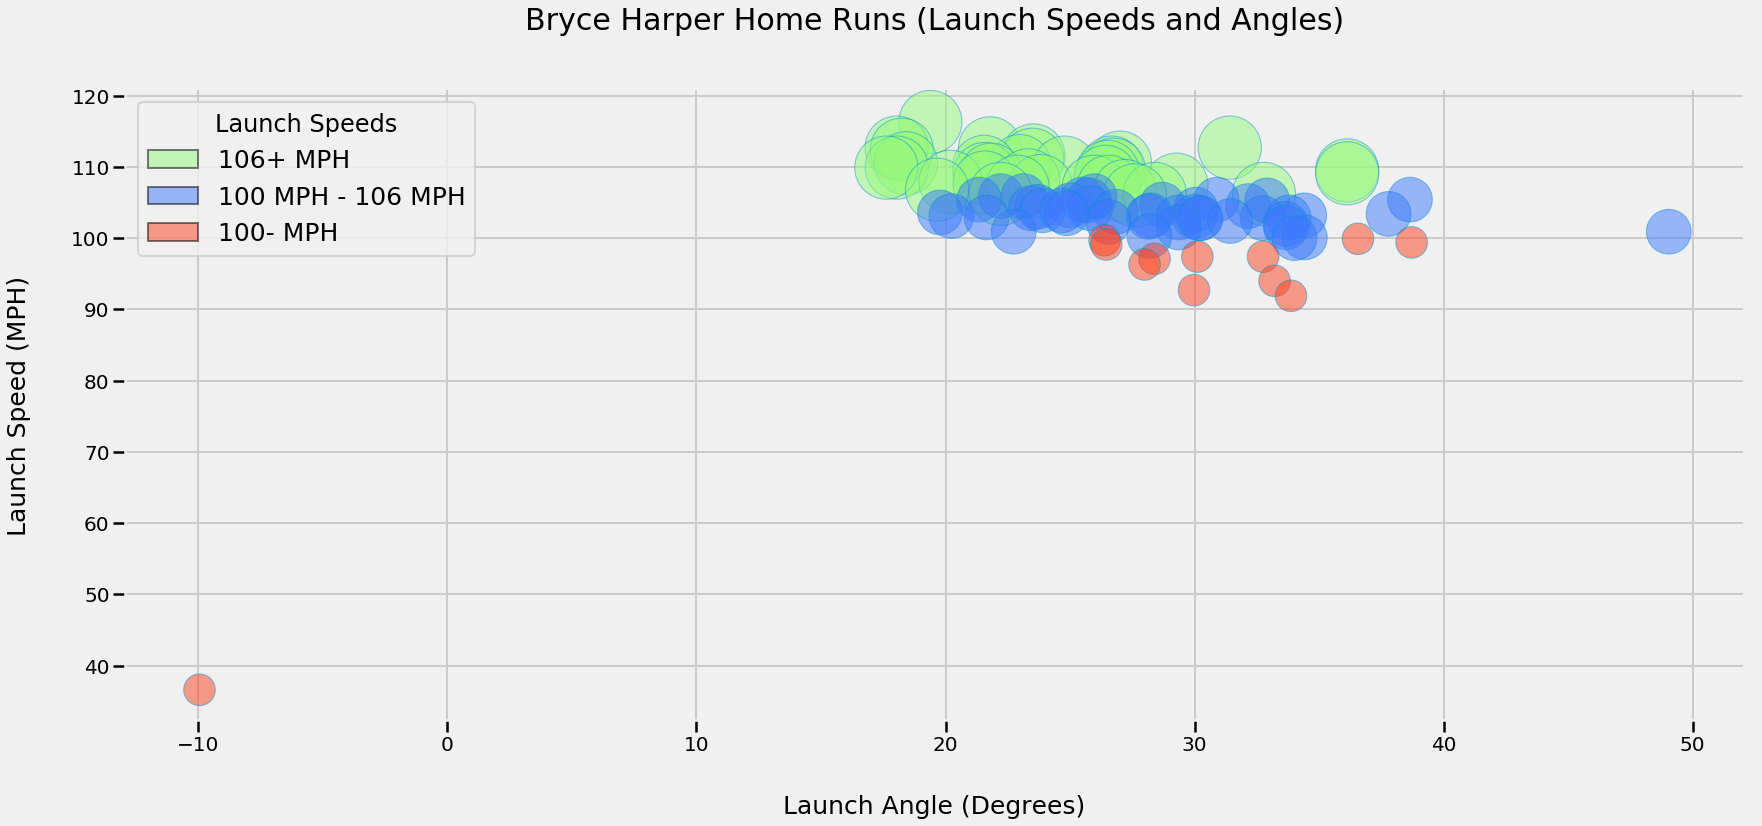

In [31]:
plt.figure(figsize=(25, 12))

sns.set_context('poster', rc={'patch.linewidth':2, 'patch.edgecolor':'k'})

plt.title('Bryce Harper Home Runs (Launch Speeds and Angles)', fontsize=30, pad=60)

a = sns.regplot(harper_df2['launch_angle'], 
                harper_df2['launch_speed'],
                scatter_kws={'s':harper_df2['point_size'], 'facecolors':harper_df2['color'], 'alpha':.5},
                fit_reg=False)


plt.xlabel('Launch Angle (Degrees)', fontsize=25, labelpad=40)
plt.ylabel('Launch Speed (MPH)', fontsize=25, labelpad=40)


a.tick_params(labelsize=20,labelcolor="k")
sns.despine()

greenpatches = mpatches.Patch(edgecolor='k', facecolor='#96f97b', label='106+ MPH', alpha=.5)
bluepatches = mpatches.Patch(edgecolor='k', facecolor='#3d7afd', label='100 MPH - 106 MPH', alpha=.5)
redpatches = mpatches.Patch(edgecolor='k', facecolor='#fd411e', label='100- MPH', alpha=.5)

plt.legend(title='Launch Speeds', handles=[greenpatches, bluepatches, redpatches], loc=2, fontsize=25)

plt.tight_layout();
plt.savefig('../plots/harper_speeds_angles.png')

#### Outliers

The most interesting point on the above plot is the one outlier. On one occasion Bryce Harper hit a home run that launched from an angle of negative 9.955 degrees and left the ball park at a speed of 36.6 mph but still traveled a total of 400.58 feet.

That's what I call power!

In [15]:
harper_df[harper_df['launch_speed'] < 50][['game_year', 'launch_speed', 'launch_angle', 'hit_distance_sc']]

,game_year,launch_speed,launch_angle,hit_distance_sc
16380,2015,36.6,-9.955,400.583333


### Bryce Harper Home Run Distance

The below plot will provide insight into the distance and velocity for each home run hit.

In [16]:
harper_distance = harper_df[['launch_speed', 'hit_distance_sc']].copy()
harper_distance.sort_values('hit_distance_sc', ascending=False, inplace=True)

In [17]:
ps = []
color=[]
for x in harper_distance['hit_distance_sc']:
    if x >= 450:
        ps.append(3000)
        color.append('#96f97b')
    elif 400 <= x < 450:
        ps.append(1000)
        color.append('#3d7afd')
    elif x < 400:
        ps.append(500)
        color.append('#fd411e')
harper_distance['point_size'] = ps
harper_distance['color'] = color

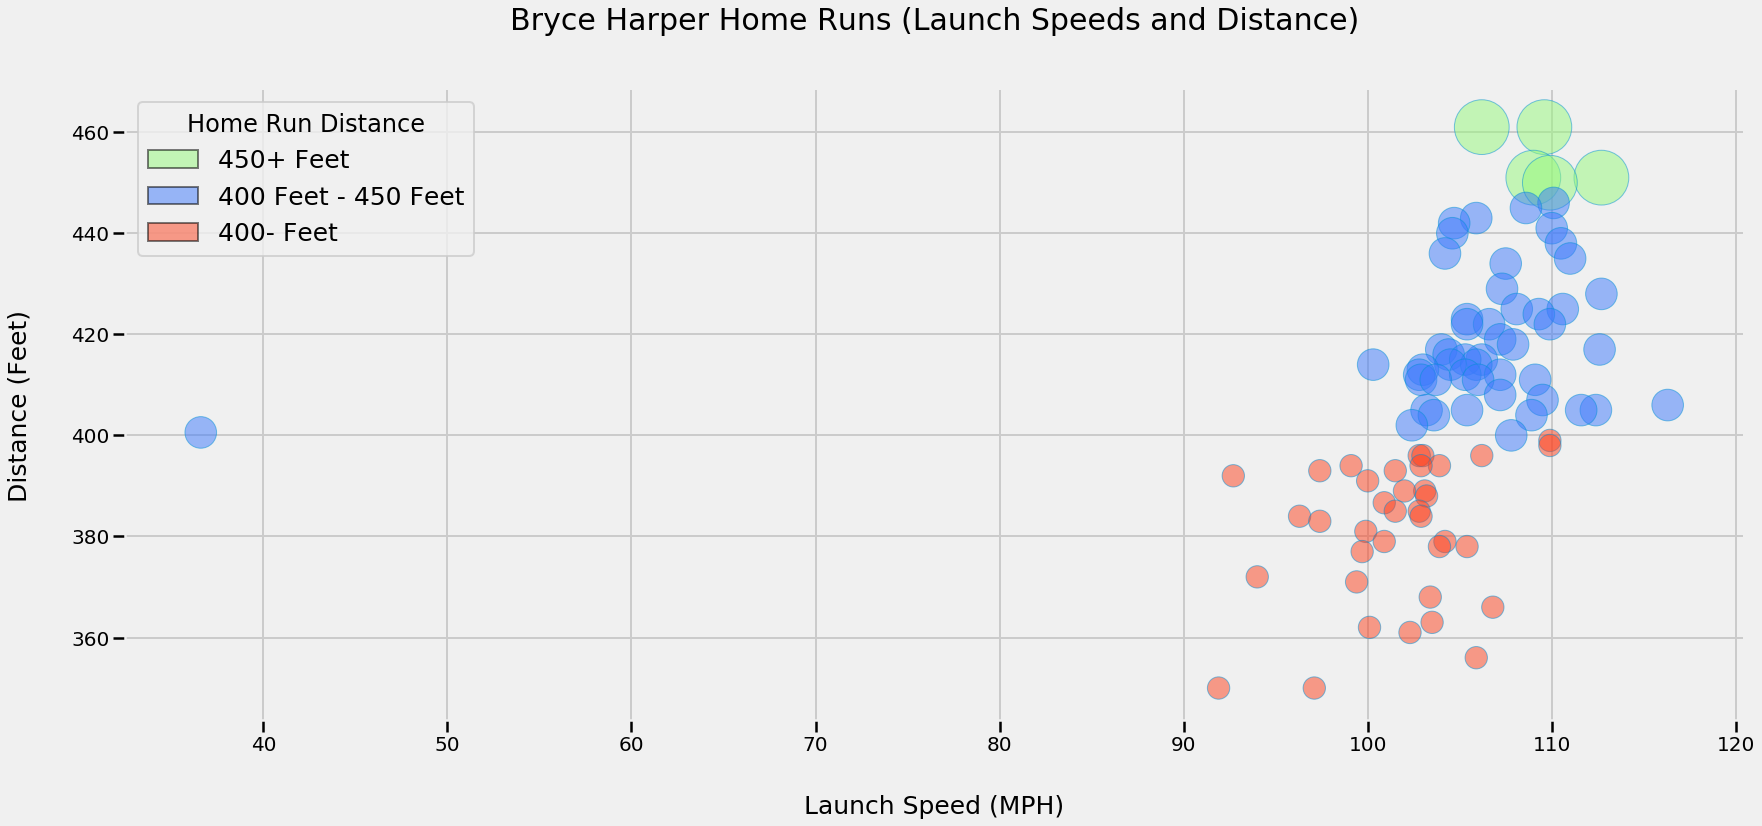

In [32]:
plt.figure(figsize=(25, 12))

sns.set_context('poster', rc={'patch.linewidth':2})

plt.title('Bryce Harper Home Runs (Launch Speeds and Distance)', fontsize=30, pad=60)

a = sns.regplot(harper_distance['launch_speed'], 
                harper_distance['hit_distance_sc'],
                scatter_kws={'s':harper_distance['point_size'], 'facecolors':harper_distance['color'], 'alpha':.5},
                fit_reg=False)


plt.xlabel('Launch Speed (MPH)', fontsize=25, labelpad=40)
plt.ylabel('Distance (Feet)', fontsize=25, labelpad=40)


a.tick_params(labelsize=20,labelcolor="k")
sns.despine()

greenpatches = mpatches.Patch(edgecolor='k', facecolor='#96f97b', label='450+ Feet', alpha=.5)
bluepatches = mpatches.Patch(edgecolor='k', facecolor='#3d7afd', label='400 Feet - 450 Feet', alpha=.5)
redpatches = mpatches.Patch(edgecolor='k', facecolor='#fd411e', label='400- Feet', alpha=.5)

plt.legend(title='Home Run Distance', handles=[greenpatches, bluepatches, redpatches], loc=2, fontsize=25)

plt.tight_layout();
plt.savefig('../plots/speeds_distance.png')

### Bryce Harper Home Runs by Pitch

The below plot will provide insight into Harper's total number of home runs by pitch type.

- `pitch_type`: The type of pitch that was thrown and hit for a home run
    - `CH` : `Changeup`
    - `CU` : `Curveball`
    - `EP` : `Eephus`
    - `FC` : `Cut Fastball (Cutter)`
    - `FF` : `Four-seam Fastball`
    - `FO` : `Pitch Out`
    - `FS` : `Sinking Fastball / Split-Fingered (Splitter)`
    - `FT` : `Two-seam Fastball`
    - `KC` : `Knuckle-curve`
    - `KN` : `Knuckleball`
    - `SC` : `Screwball`
    - `SI` : `Sinker`
    - `SL` : `Slider`

In [33]:
harper_pitch = harper_df.groupby(['pitch_type', 'game_year']).agg({'pitch_type':'count'})
harper_pitch.columns = ['home_runs']
harper_pitch.reset_index(inplace=True)
harper_pitch.sort_values('home_runs', ascending=False, inplace=True)

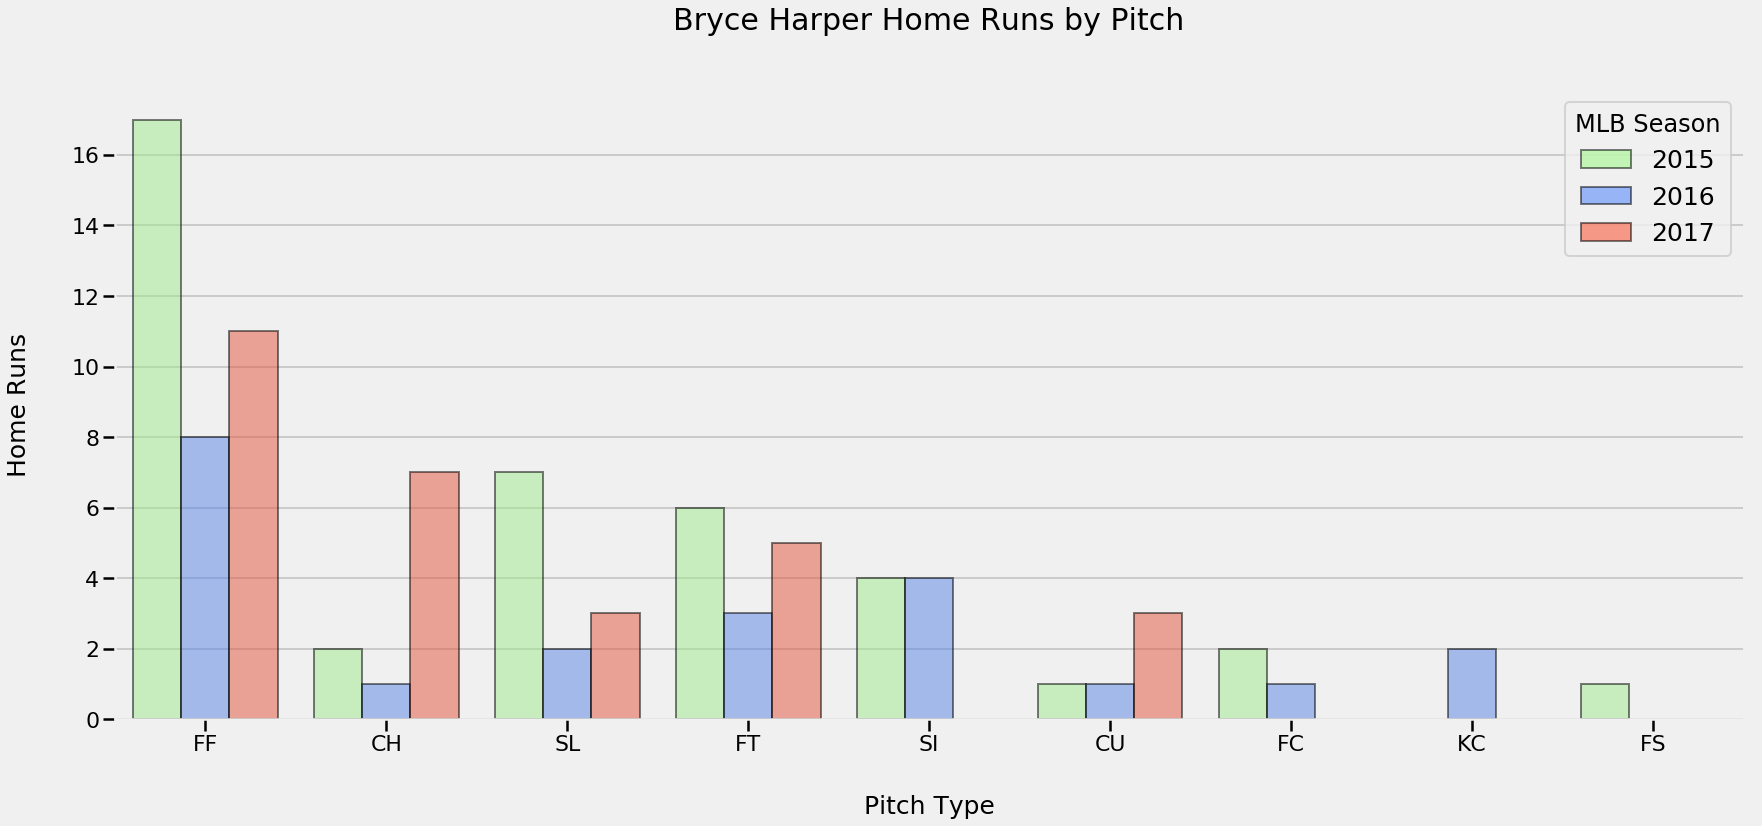

In [38]:
plt.figure(figsize=(25, 12))

colors = ["light green", "lightish blue", "orange red"]
palette=sns.xkcd_palette(colors)
sns.set_context('poster', rc={'patch.linewidth':2})

plt.title('Bryce Harper Home Runs by Pitch', fontsize=30, pad=60)

a = sns.barplot(harper_pitch['pitch_type'],
                harper_pitch['home_runs'],
                hue=harper_pitch['game_year'],
                palette=palette,
                edgecolor='k',
                alpha=.5)

sns.despine()

plt.xlabel('Pitch Type', fontsize=25, labelpad=40)
plt.ylabel('Home Runs', fontsize=25, labelpad=40)

greenpatches = mpatches.Patch(edgecolor='k', facecolor='#96f97b', label='2015', alpha=.5)
bluepatches = mpatches.Patch(edgecolor='k', facecolor='#3d7afd', label='2016', alpha=.5)
redpatches = mpatches.Patch(edgecolor='k', facecolor='#fd411e', label='2017', alpha=.5)

plt.legend(title='MLB Season', handles=[greenpatches, bluepatches, redpatches], loc=1, fontsize=25)

plt.tight_layout();
plt.savefig('../plots/hr_pitch_type.png')

### Bryce Harper Home Runs by Zone

The below plot will provide insights into number of home runs that Harper hits from each zone of the batters box by MLB season.

<img src="https://cdn2.vox-cdn.com/assets/4655223/zone.png" style="float: left; margin: 20px; height: 300px">

In [21]:
harper_zone = harper_df.groupby(['zone', 'game_year']).agg({'zone':'count'})

In [22]:
harper_zone.columns = ['home_runs']

In [23]:
harper_zone.reset_index(inplace=True)

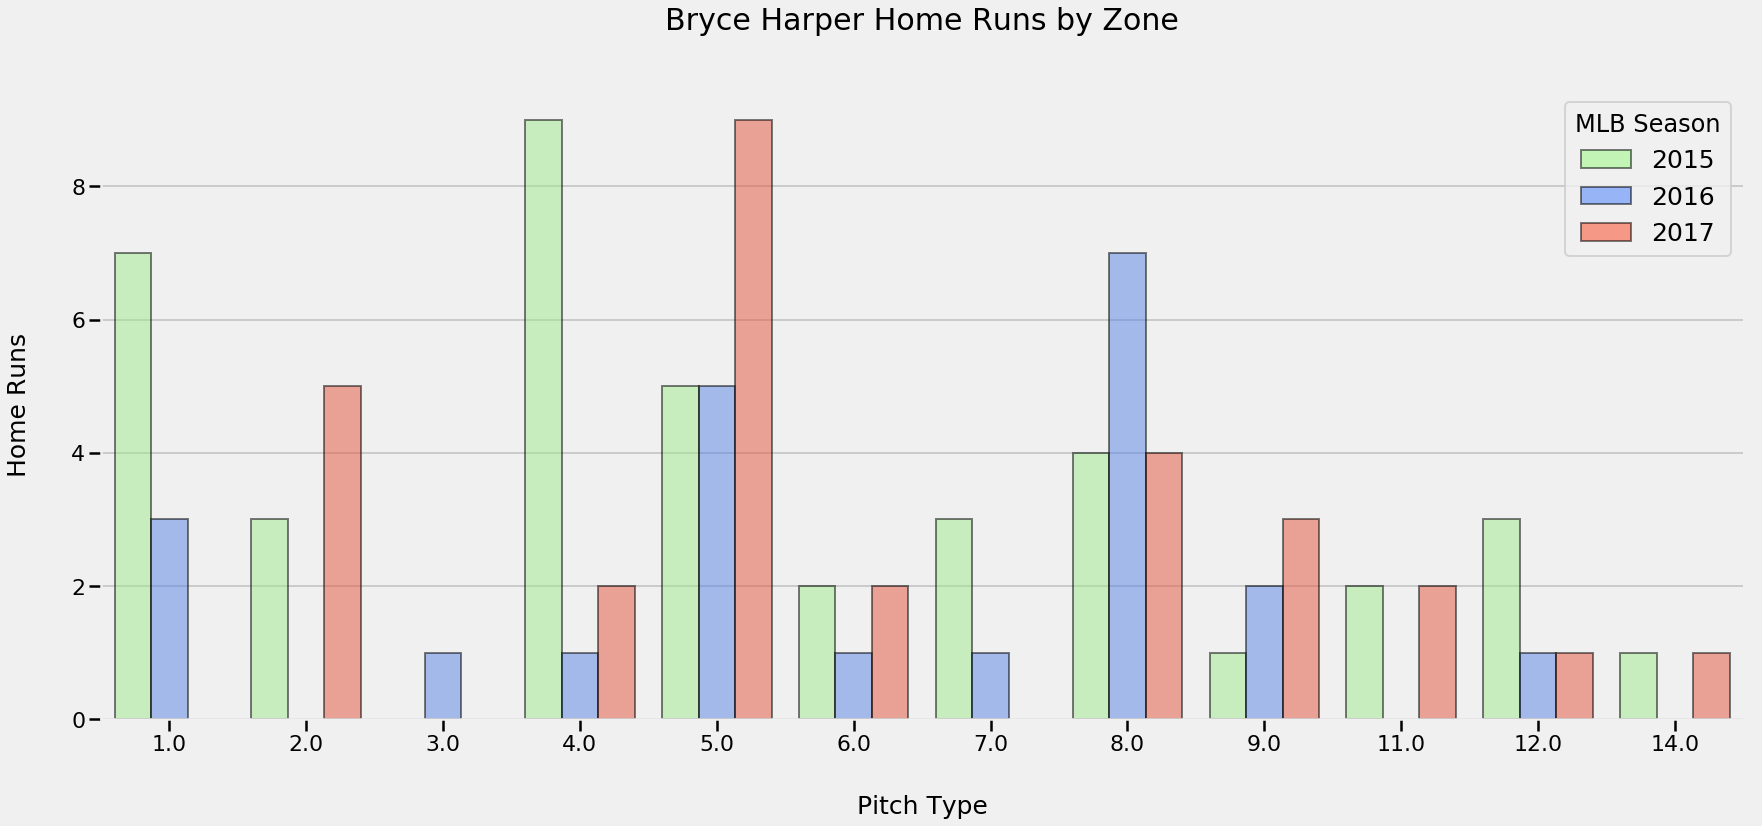

In [35]:
plt.figure(figsize=(25, 12))

colors = ["light green", "lightish blue", "orange red"]
palette=sns.xkcd_palette(colors)
sns.set_context('poster', rc={'patch.linewidth':2})

plt.title('Bryce Harper Home Runs by Zone', fontsize=30, pad=60)

a = sns.barplot(harper_zone['zone'],
                harper_zone['home_runs'],
                hue=harper_zone['game_year'],
                palette=palette,
                edgecolor='k',
                alpha=.5)

sns.despine()

plt.xlabel('Pitch Type', fontsize=25, labelpad=40)
plt.ylabel('Home Runs', fontsize=25, labelpad=40)

greenpatches = mpatches.Patch(edgecolor='k', facecolor='#96f97b', label='2015', alpha=.5)
bluepatches = mpatches.Patch(edgecolor='k', facecolor='#3d7afd', label='2016', alpha=.5)
redpatches = mpatches.Patch(edgecolor='k', facecolor='#fd411e', label='2017', alpha=.5)

plt.legend(title='MLB Season', handles=[greenpatches, bluepatches, redpatches], loc=1, fontsize=25)

plt.tight_layout();
plt.savefig('../plots/harper_zones.png')

### Bryce Harper Home Runs by Batted Ball Type

The below plot will provide insight into the number of home runs that Harper has hit by Batted Ball type by MLB season. Batted Ball type is recorded as one of the following:
- Fly Ball
- Line Drive

**Batted Ball Type by Launch Angle**

| Ground Ball | Line Drive | Fly Ball | Pop Up |
|-------------|------------|----------|--------|
| Less than 10 degrees | 10-25 degrees | 25-50 degrees | Greater than 50 degrees |

In [25]:
harper_bb_type = harper_df.groupby(['bb_type', 'game_year']).agg({'pitch_type':'count'})

In [26]:
harper_bb_type.reset_index(inplace=True)

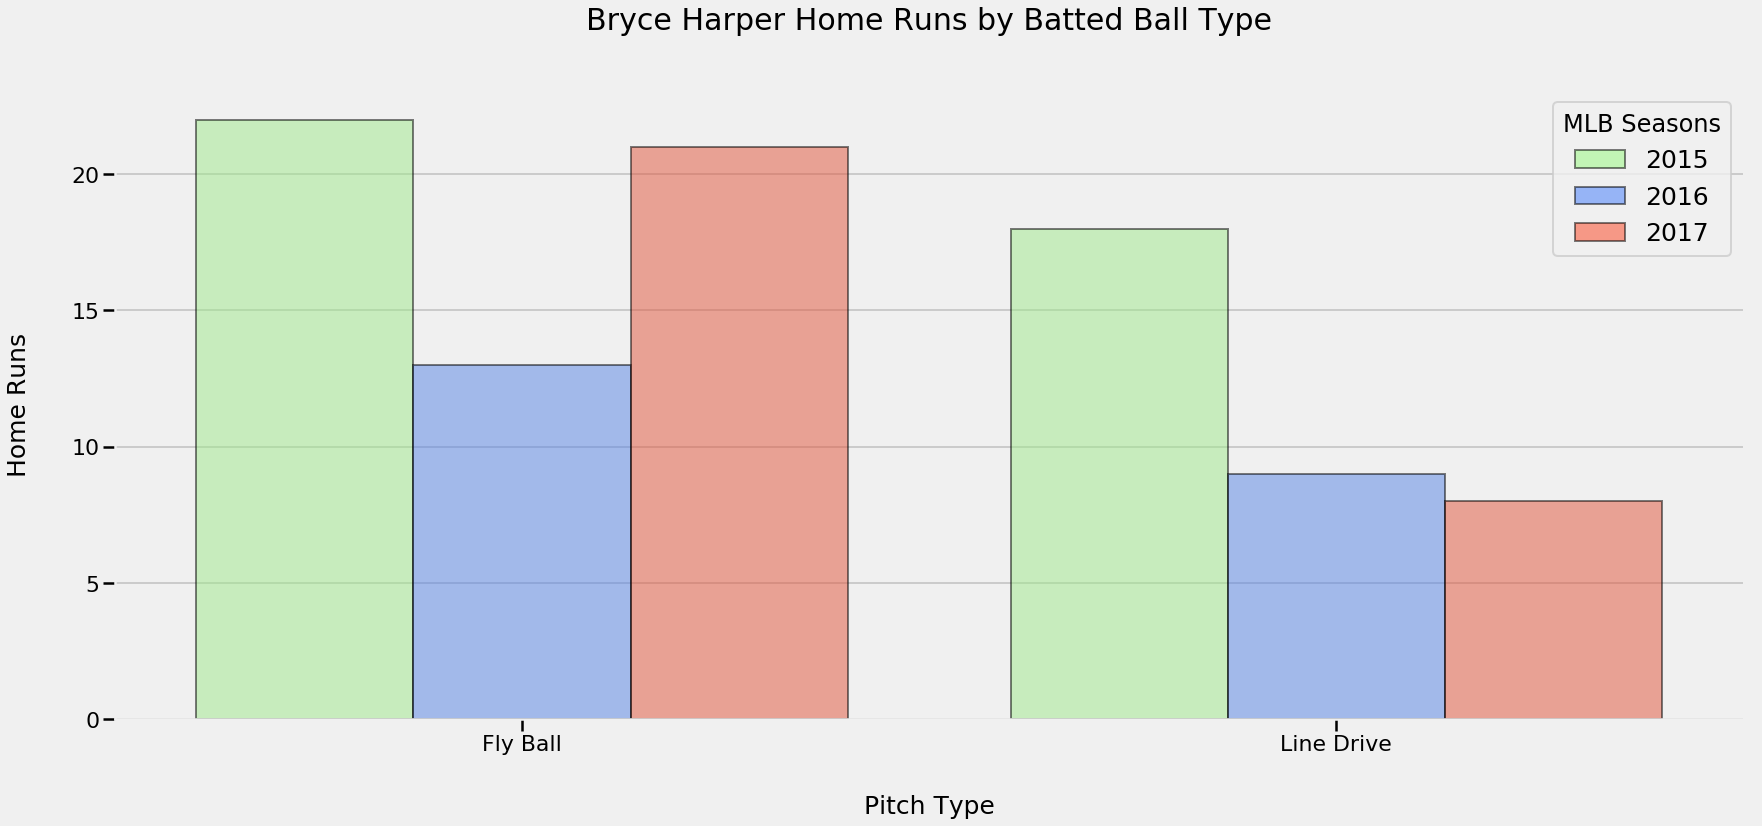

In [36]:
plt.figure(figsize=(25, 12))

colors = ["light green", "lightish blue", "orange red"]
palette=sns.xkcd_palette(colors)
sns.set_context('poster', rc={'patch.linewidth':2})

plt.title('Bryce Harper Home Runs by Batted Ball Type', fontsize=30, pad=60)

a = sns.barplot(harper_bb_type['bb_type'].replace({'line_drive':'Line Drive', 'fly_ball':'Fly Ball'}),
                harper_bb_type['pitch_type'],
                hue=harper_bb_type['game_year'],
                palette=palette,
                edgecolor='k',
                alpha=.5)

sns.despine()

plt.xlabel('Pitch Type', fontsize=25, labelpad=40)
plt.ylabel('Home Runs', fontsize=25, labelpad=40)

greenpatches = mpatches.Patch(edgecolor='k', facecolor='#96f97b', label='2015', alpha=.5)
bluepatches = mpatches.Patch(edgecolor='k', facecolor='#3d7afd', label='2016', alpha=.5)
redpatches = mpatches.Patch(edgecolor='k', facecolor='#fd411e', label='2017', alpha=.5)

plt.legend(title='MLB Seasons', handles=[greenpatches, bluepatches, redpatches], loc=1, fontsize=25)

plt.tight_layout();
plt.savefig('../plots/harper_bb_type.png')

### Bryce Harper Exit Velocity Correlations against  various Pitch Stats

The below subplots will provide insight into Harpers exit velocity with specific pitch stats. When examining correlations we are looking for strong positive or negative correlations. A strong positive correlation will be closer to 1 and a strong negative correlation will be closer to -1

**Pitch Stats:**
1. Release Speed: 
    - A weak positive correlation. Meaning that as the release speed of the pitch increases so will the exit velocity of Harper's home runs. It's a very low correlation meaning that this stat against velocity is not going to provide a whole lot of valuable insight into exit velocity.
2. Release Spin Rate:
    - A weak postive correlation. Meaning that as the release spin rate of the pitch increase so the the exit velocity of Harper's home runs. It's larger than the Release Speed correlation but still quite low and won't provide very much value into the exit velocity.
3. Release Extension:
    - A weak negative correlation. Meaning that as the release extension of the pitch increases the exit velocity of Harper's home runs will decrease. Still a low value but it's the strongest correlation value of the previous two thus far but will still not provide very much value into the exit velocity.
4. Effective Speed:
    - A weak negative correlation. Meaning that as the effective speed of the pitch increases the exit velocity of Harper's home runs will decrease. Another very low value meaning we won't be able to draw valuable insights into the exit velocity (at this point).
    
##### Overall Interpretation

Even though the below pitch stats are all showing weak correlations to the target stat (exit velocity) it's still worth examining to understand if/where the strengths are in the data.

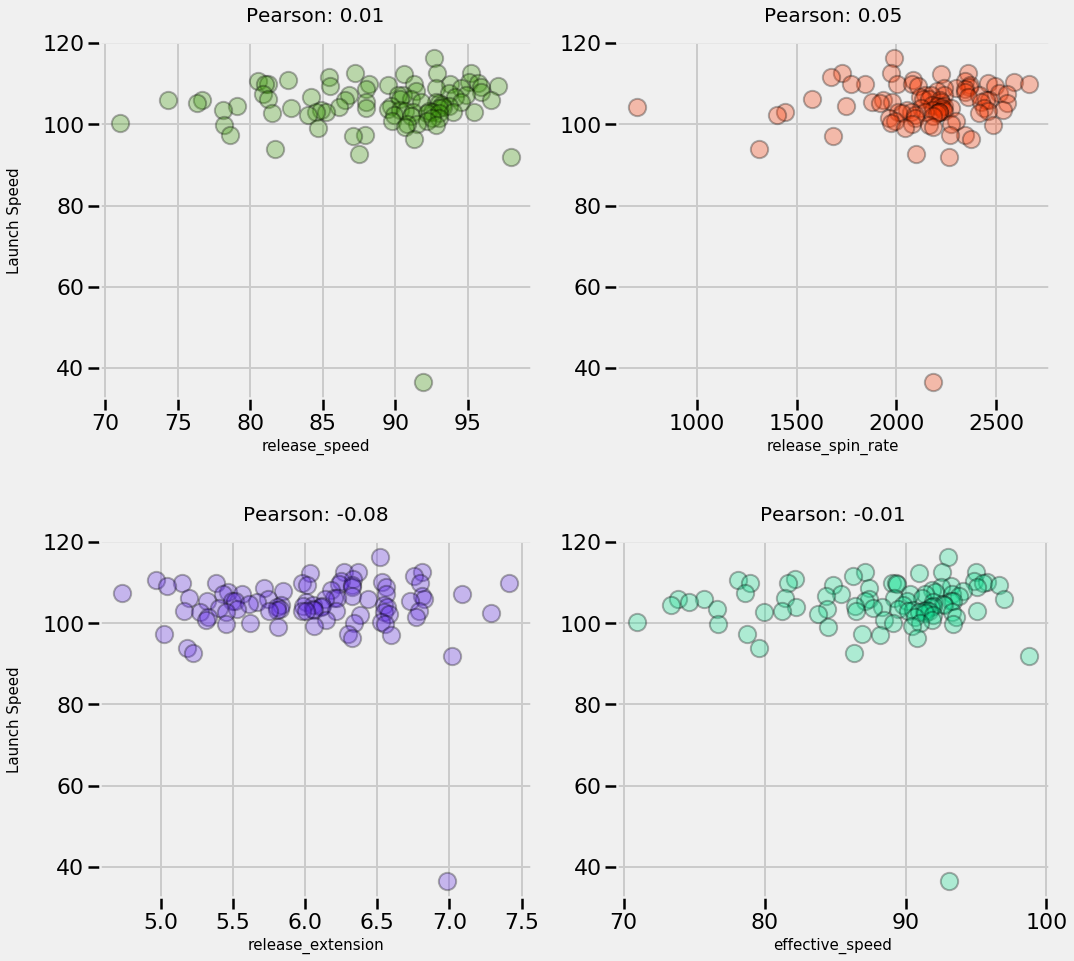

In [37]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(17,12))
fig.subplots_adjust(left=0.125, bottom=0.01, right=0.9, top=1.0, wspace=None, hspace=.4)

ax=ax.flatten()

cols = ['release_speed',
        'release_spin_rate',
        'release_extension',
        'effective_speed']

colors=['#3f9b0b', 
        '#fd3c06', 
        '#632de9', 
        '#12e193', 
        '#fcb001', 
        '#49759c', 
        '#3b638c', 
        '#21fc0d', 
        '#98568d']

j=0
for i in ax:
    if j==0 or j==2:
        i.set_ylabel('Launch Speed', fontsize=15, labelpad=20)
    i.scatter(harper_df[cols[j]], harper_df['launch_speed'],  alpha=0.3, color=colors[j], s=300, edgecolors='k')
    i.set_xlabel(cols[j], fontsize=15, labelpad=5)
    i.set_title(f'Pearson: {harper_df.corr().loc[cols[j]]["launch_speed"].round(2)}', pad=20, fontsize=20)
    j+=1

plt.savefig('../plots/launch_speed_correlations.png')

### Save Bryce Harper Dataframe

In [29]:
harper_df.to_csv('../data/harper_data.csv', index=False)